In [129]:
# 1.1 Generating Your Own Unique Data

In [130]:
%run datasetGenerator.py --ID 1001960046

In [131]:
# 1.2 Fisher’s Exact Test

In [132]:
import csv
import numpy as np
import pandas as pd
from scipy.stats import fisher_exact
from pandas import DataFrame
from scipy.stats import uniform
from scipy.stats import randint
import matplotlib.pyplot as plt
with open("C:/Users/ksvha/1001960046.csv", 'r') as file:
    header=next(file)
    reader = csv.reader(file,delimiter='\t')
    pvalues=[]
    oddsratio=[]
    for row in reader:
        row_vals=row[0].split(",")[1:]
        row_vals=list(map(int, row_vals))
        #print("1",row_vals)
        table=np.array([row_vals])
        table=np.resize(table,(2,2))
        #print(table)
        oddsr, p = fisher_exact(table, alternative='less')
        oddsratio.append(oddsr)
        pvalues.append(p)
df = pd.read_csv("C:/Users/ksvha/1001960046.csv")
df["oddsratio"] = oddsratio
df["pvalues"]=pvalues
df.to_csv("C:/Users/ksvha/1001960046_2.csv", index=False)

In [133]:
df

,SNP,Case_Num_C_Allele,Case_Num_T_Allele,Control_Num_C_Allele,Control_Num_T_Allele,oddsratio,pvalues
0,snp0,49,1,27,73,132.481481,1.000000e+00
1,snp1,42,8,84,16,1.000000,5.863628e-01
2,snp2,3,47,68,32,0.030038,3.842996e-14
3,snp3,1,49,18,82,0.092971,3.004193e-03
4,snp4,17,33,37,63,0.877150,4.306495e-01
...,...,...,...,...,...,...,...
995,snp995,29,21,34,66,2.680672,9.985519e-01
996,snp996,29,21,22,78,4.896104,9.999971e-01
997,snp997,3,47,38,62,0.104143,1.038844e-05
998,snp998,9,41,99,1,0.002217,8.178917e-27


In [134]:
pvalues_generated = df['pvalues']

result = pd.DataFrame(pvalues_generated)

In [135]:
result

,pvalues
0,1.000000e+00
1,5.863628e-01
2,3.842996e-14
3,3.004193e-03
4,4.306495e-01
...,...
995,9.985519e-01
996,9.999971e-01
997,1.038844e-05
998,8.178917e-27


In [136]:
result = result.assign(significant= df['pvalues']<5e-8)

In [137]:
result

,pvalues,significant
0,1.000000e+00,False
1,5.863628e-01,False
2,3.842996e-14,True
3,3.004193e-03,False
4,4.306495e-01,False
...,...,...
995,9.985519e-01,False
996,9.999971e-01,False
997,1.038844e-05,False
998,8.178917e-27,True


In [138]:
result['significant'].value_counts() [True]

170

In [139]:
result.to_csv("C:/Users/ksvha/result.csv", index=False)

In [140]:
# 1.3 Corrected P-Values

In [141]:
result = result.assign(significant_corrected= df['pvalues']<5e-11)

In [142]:
result

,pvalues,significant,significant_corrected
0,1.000000e+00,False,False
1,5.863628e-01,False,False
2,3.842996e-14,True,True
3,3.004193e-03,False,False
4,4.306495e-01,False,False
...,...,...,...
995,9.985519e-01,False,False
996,9.999971e-01,False,False
997,1.038844e-05,False,False
998,8.178917e-27,True,True


In [143]:
result['significant_corrected'].value_counts() [True]

118

In [144]:
result.to_csv("/Users/ksvha/result.csv", index=False)

In [145]:
# 1.4 Manhattan Plots

Text(0.5, 0, 'SNP')

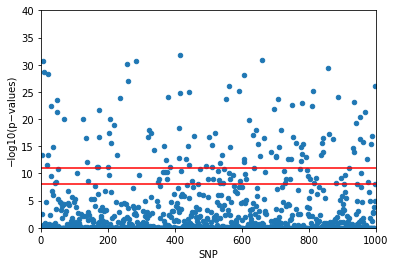

In [146]:
# -log_10(pvalue)
df['−log10(p−values)'] = -np.log10(df.pvalues)

# Plotting of SNP vs. -log10(pvalue)
df['SNP'] = range(len(df))
df_grouped = df.groupby(('SNP'))

fig = plt.figure()
ax = fig.add_subplot(111)
for num, (name, group) in enumerate(df_grouped):
    group.plot(kind='scatter', x='SNP', y='−log10(p−values)', ax=ax)
    
plt.axhline(y = 8, color = 'r', label = "red line")
plt.axhline(y = 11, color = 'r', label = "red line")
ax.set_xlim([0, len(df.pvalues)])
ax.set_ylim([0, 40])
ax.set_xlabel('SNP')